<a href="https://colab.research.google.com/github/24057080-kiit/capstone-projects-using-machine-learning-techniques/blob/main/2022_06_13_SourabhKumar_CapstoneProject16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 16: Diamond Price Prediction

---

### Context

Diamond is one of the precious stones which are always in huge demand in the investment market. Diamonds are also used in many industrial applications like cutting but it is mostly used as a gemstone. The actual price of a diamond however is determined by a gemologist after examining its various features such as its carat, cut, color, and clarity. Dimensions of a diamond is also a very important parameter to determine its worth. Nearly, 142 million carats of diamonds were produced worldwide in 2019 alone. This makes it very important to come up with some smart technique to estimate its worth.







---

### Problem Statement

A diamond distributor decided to put almost 2000 diamonds for auction. A jewellery company is interested in making a bid to purchase these diamonds in order to expand their business. As a data scientist, your job is to build a prediction model to predict the price of diamonds so that your company knows how much it should bid.













---

#### Getting Started

Follow the steps described below to solve the project:

1. Click on the link provided below to open the Colab file for this project.
   
   https://colab.research.google.com/drive/1YP4OiSvsLVur_2GbEcCnbugflUXrlJP-?usp=sharing

2. Create the duplicate copy of the Colab file. Here are the steps to create the duplicate copy:

    - Click on the **File** menu. A new drop-down list will appear.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/0_file_menu.png' width=500>

    - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/1_create_colab_duplicate_copy.png' width=500>

     - After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_CapstoneProject16** format.

3. Now, write your code in the prescribed code cells.

---

### Data Description

The **diamonds** dataset contains the prices and other attributes of almost 54,000 diamonds. Following are the attributes:  


|Column|Description|
|---:|:---|
|`carat`|weight of the diamond|
|`cut`|quality of the cut|
|`color`|diamond colour, from J (worst) to D (best)|
|`clarity`|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|`table`|The width of the diamond's table expressed as a percentage of its average diameter|
|`price`|price in US dollars|
|`x`|length in mm|
|`y`|width in mm|
|`z`|depth in mm|
|`depth`|total depth percentage = $\frac{2z}{x + y}$|

  **Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/diamonds.csv

---

### Things To Do

1. Explore the diamond dataset by creating the following plots:
   - Box plots between each categorical feature and the `price`.
   - Scatter plots between the numerical features and the `price`.
   
2. Convert categorical attributes into numerical attributes.

3. Create a correlation heatmap for all the columns.

4. Build a linear regression model by selecting the most relevant features to predict the price of diamonds.

5. Reduce multicollinearity (if exists) by eliminating highly correlated and high VIF features.

5. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and by checking for homoscedasticity.



---

#### 1. Import Modules and Load Dataset

Link to the dataset: https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/diamonds.csv

In [ ]:
# Import the required modules and load the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
# Drop 'Unnamed: 0' column as it is of no use
df.drop(columns = ['Unnamed: 0'],axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


---

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables.

Perform the following tasks:

- Create Box plots between each **categorical** variable and the target variable `price` to sense the distribution of values.

- Create the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`.

- Create a normal distribution curve for the `price`.


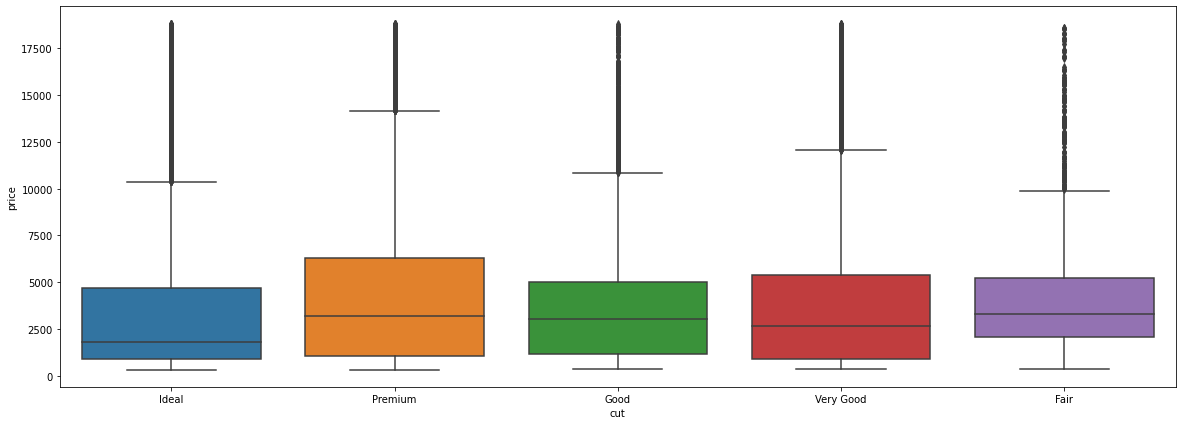

In [ ]:
# Boxplot for 'cut' vs 'price'
plt.figure(figsize = (20,7))
sns.boxplot(x = 'cut',y = 'price',data = df)
plt.show()

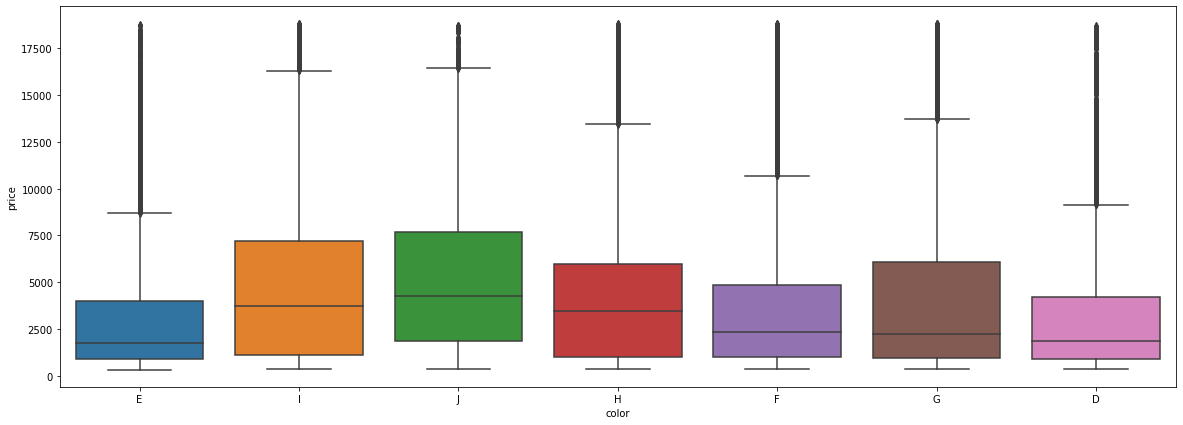

In [ ]:
# Boxplot for 'color' vs 'price'
plt.figure(figsize = (20,7))
sns.boxplot(x= 'color', y = 'price', data = df)
plt.show()

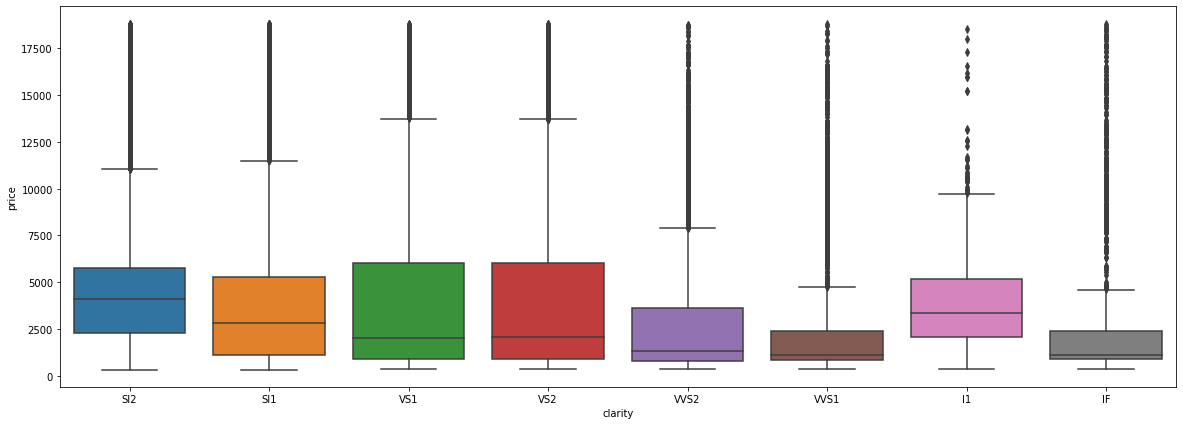

In [ ]:
# Boxplot for 'clarity' vs 'price'
plt.figure(figsize=(20,7))
sns.boxplot(x = 'clarity',y = 'price' , data = df)
plt.show()

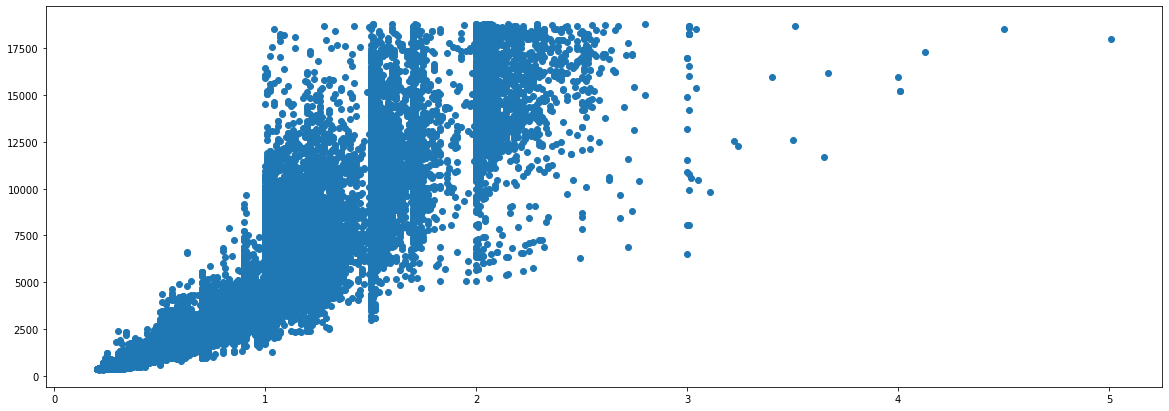

In [ ]:
# Create scatter plot with 'carat' on X-axis and 'price' on Y-axis
plt.figure(figsize = (20,7))
plt.scatter(x= 'carat' ,y = 'price' , data = df)
plt.show()


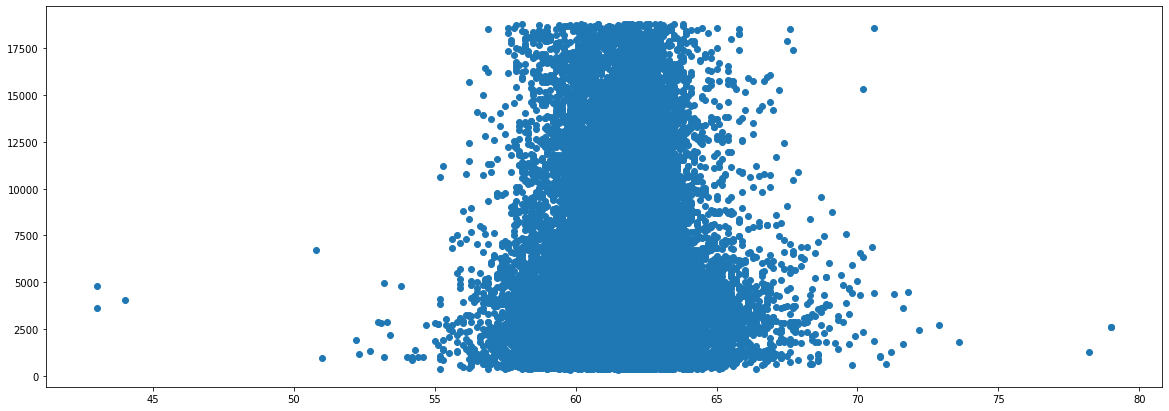

In [ ]:
# Create scatter plot with 'depth' on X-axis and 'price' on Y-axis
plt.figure(figsize = (20,7))
plt.scatter(x = 'depth' ,y = 'price' ,data = df)
plt.show()

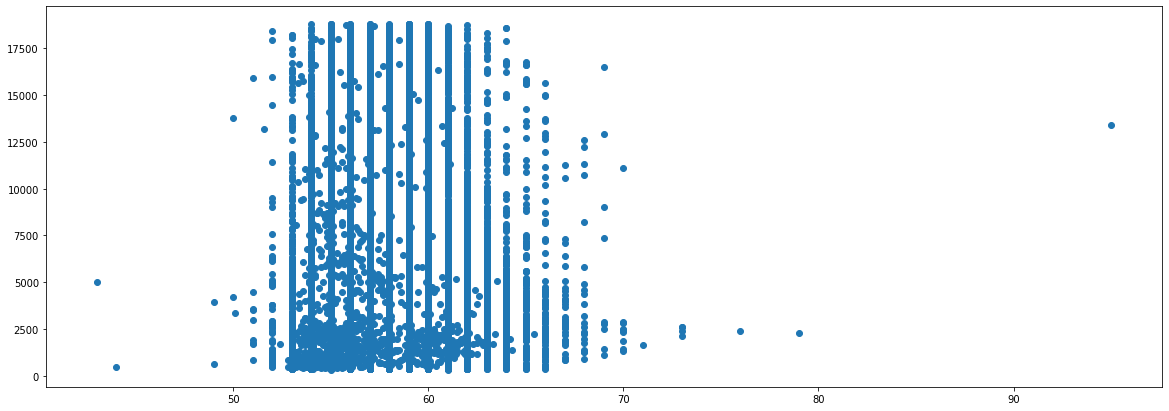

In [ ]:
# Create scatter plot with 'table' on X-axis and 'price' on Y-axis
plt.figure(figsize=(20,7))
plt.scatter(x = 'table' , y = 'price' , data = df)
plt.show()

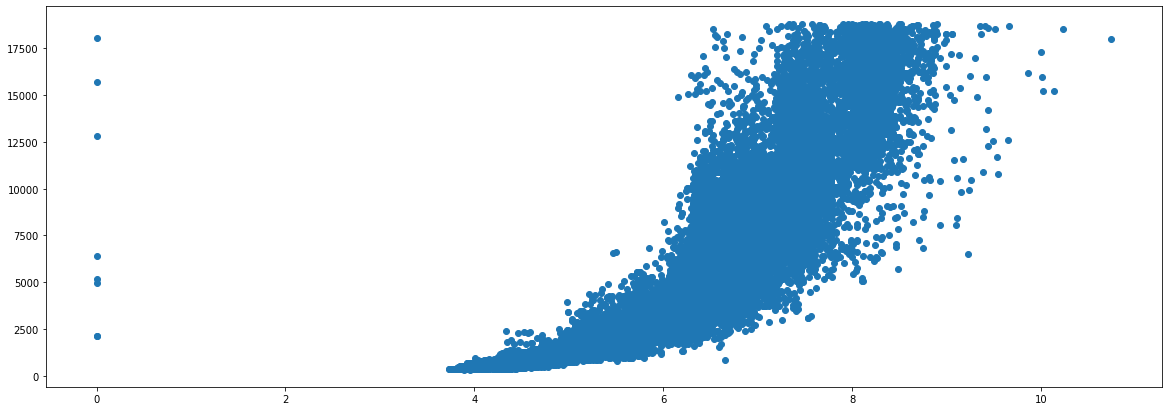

In [ ]:
# Create scatter plot with attribute 'x' on X-axis and 'price' on Y-axis
plt.figure(figsize=(20,7))
plt.scatter(x = 'x', y = 'price',data = df)
plt.show()

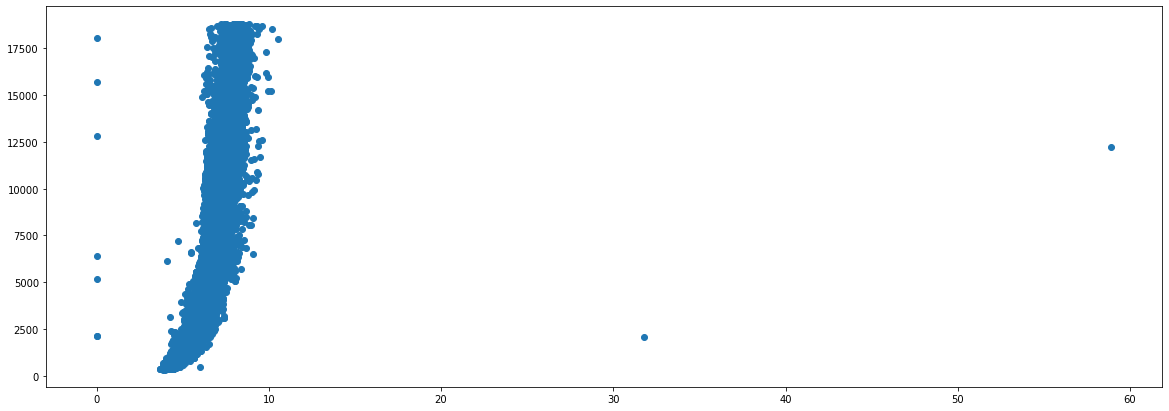

In [ ]:
# Create scatter plot with attribute 'y' on X-axis and 'price' on Y-axis
plt.figure(figsize =(20,7))
plt.scatter(x = 'y',y = 'price' ,data = df)
plt.show()

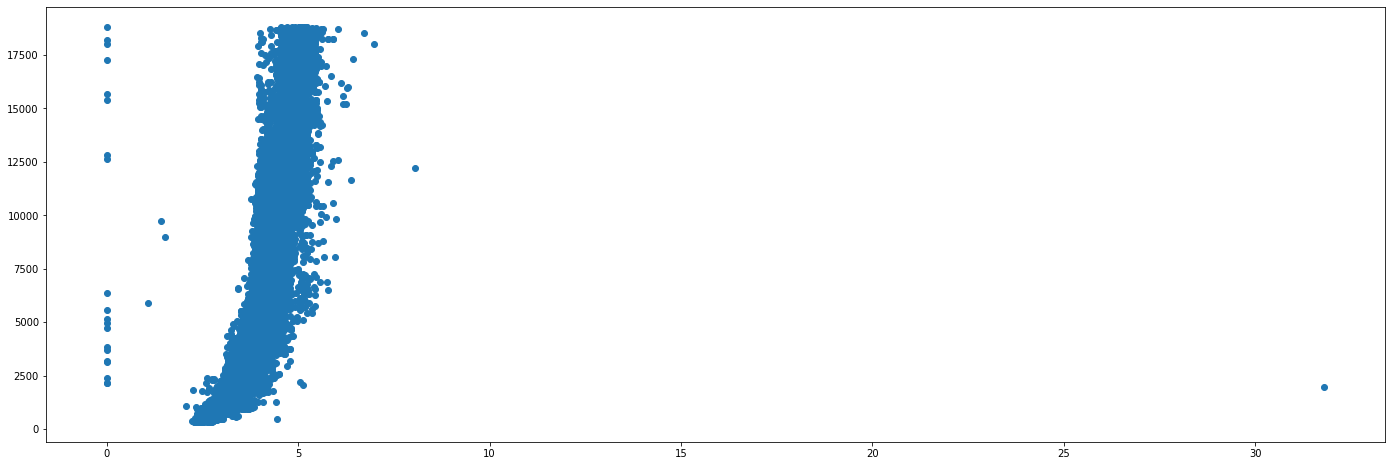

In [ ]:
# Create scatter plot with 'z' on X-axis and 'price' on Y-axis
plt.figure(figsize = (24,8))
plt.scatter(x = "z",y = "price", data = df)
plt.show()

**Q:** Which attribute exhibit the best linear relationship with the target variable `price`?

**A:** X

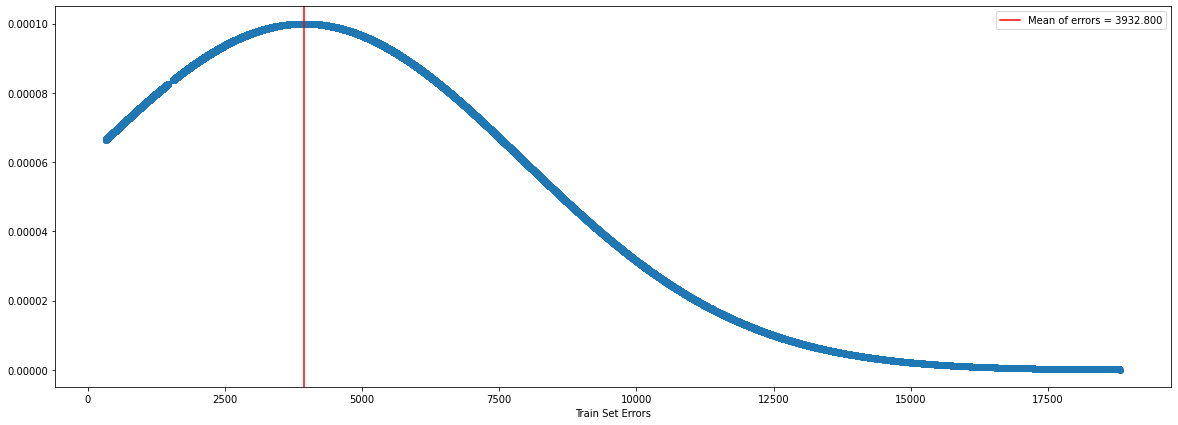

In [ ]:
# Create a normal distribution curve for the `price`.
# Create a probablity density function for plotting the normal distribution
def prob_density(series):
  const = 1 / (series.std() * np.sqrt(2 * np.pi))
  power_of_e = -(series - series.mean()) ** 2 / (2 * series.var())
  new_array = const * np.exp(power_of_e)
  return new_array
# Plot the normal distribution curve using plt.scatter()
plt.figure(figsize=(20,7))
plt.scatter(df['price'],prob_density(df['price']))
plt.axvline(x = df['price'].mean(), label = f"Mean of errors = {df['price'].mean():.3f}", color = 'r')
plt.xlabel("Train Set Errors")
plt.legend()
plt.show()

**Q:** What is the mean `price` of diamonds ?

**A:** 3932.8



---

#### 3. Feature Engineering

The dataset contains certain features that are categorical.  To convert these features into numerical ones, use `replace()` function of the DataFrame.

**For example:**

`df["column1"].replace({"a": 1, "b": 0}, inplace=True)` $\Rightarrow$ replaces all the `'a'` values with `1` and `'b'` values with `0` for feature `column1`. Use `inplace` boolean argument to to make changes in the DataFrame permanently.

Replace following values for `cut` column:

 - `Fair` with `1`
 - `Good` with `2`
 - `Very Good` with `3`
 - `Premium` with `4`
 - `Ideal` with `5`

Replace following values for the `color` column:

- `D` with `1`
- `E` with `2`
- `F` with `3`
- `G` with `4`
- `H` with `5`
- `I` with `6`

Replace following values for the `clarity` column:

- `I1` with `1`
- `SI2` with `2`
- `SI1` with `3`
- `VS2` with `4`
- `VS1` with `5`
- `VVS2` with `6`
- `VVS1` with `7`
- `IF` with `8`

In [ ]:
# Replace values of 'cut' column
df['cut'].replace(to_replace={'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}, inplace=True)

In [ ]:
# Replace values of 'color' column
df['color'].replace(to_replace={'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}, inplace=True)

In [ ]:
# Replace values of 'clarity' column
df['clarity'].replace(to_replace={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}, inplace=True)

---

#### 4. Model Training

Build a multiple linear regression model  using all the features of the dataset. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.


In [ ]:
# Create a list of feature variables.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
features = list(df.columns.values)
features.remove('price')

In [ ]:
# Build multiple linear regression model using all the features
x = df[features]
y = df['price']
# Split the DataFrame into the train and test sets such that test set has 33% of the values.
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
# Build linear regression model using the 'sklearn.linear_model' module.
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
# Print the value of the intercept
print('\nConstant'.ljust(15,' '),f"{lin_reg.intercept_:.4f}")
# Print the names of the features along with the values of their corresponding coefficients.
for i in list(zip(x.columns.values,lin_reg.coef_)):
  print(f"{i[0]}".ljust(15,' '),f"{i[1]}")


Constant       5423.6807
carat           10720.976565938461
cut             118.65815338315554
color           -323.8142457625743
clarity         504.0142581749525
depth           -79.94879374426029
table           -28.248562766541824
x               -846.5536352687619
y               23.15037371968134
z               -29.51232887395753


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.3f}")

print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.3f}")


Train Set
--------------------------------------------------
R-squared: 0.907
Mean Squared Error: 1494736.330
Root Mean Squared Error: 1222.594
Mean Absolute Error: 809.247


Test Set
--------------------------------------------------
R-squared: 0.907
Mean Squared Error: 1450250.583
Root Mean Squared Error: 1204.264
Mean Absolute Error: 802.626


**Q:** What is the $R^2$ (R-squared) value for this model?

**A:**  0.907



---

### 5. Dealing with Multicollinearity

Create a heatmap among all variables to identify a set of features which are highly correlated with each other.


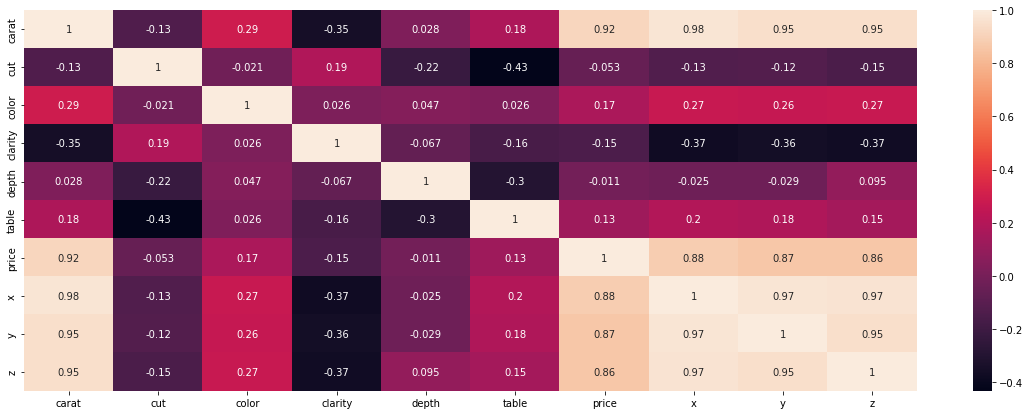

In [ ]:
# Heatmap to pinpoint the columns in the 'df' DataFrame exhibiting high correlation
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Q:** Which features are highly correlated with `price`?

**A:** Carat,X,Y,Z

**Q:** Is there multicollinearity in the dataset?

**A:** Yes

Let's consider the feature `carat` as it is highly correlated with the target variable `price`. Perform the following tasks:
1. Drop the features which are highly correlated with `carat`.
2. Calculate VIF (Variance Inflation Factor) for the remaining features.


In [ ]:
# Drop features highly correlated with 'carat'
reduced_features = list(df.columns.drop(["x","y","z"]))
reduced_features.remove('price')
reduced_features

['carat', 'cut', 'color', 'clarity', 'depth', 'table']

In [ ]:
# Again build a linear regression model using the remaining features
x = df[reduced_features]
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
# Build linear regression model using the 'sklearn.linear_model' module.
lin_reg2 = LinearRegression()
lin_reg2.fit(x_train,y_train)
# Print the value of the intercept
print('\nConstant'.ljust(15,' '),f"{lin_reg.intercept_:.4f}")
# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(x.columns.values,lin_reg2.coef_)):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")


Constant       5423.6807
carat           8799.498060
cut             119.798149
color           -319.163784
clarity         523.049968
depth           -45.019209
table           -27.742288


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_train_pred = lin_reg2.predict(x_train)
y_test_pred = lin_reg2.predict(x_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.3f}")

print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.904
Mean Squared Error: 1534955.812
Root Mean Squared Error: 1238.933
Mean Absolute Error: 857.542


Test Set
--------------------------------------------------
R-squared: 0.904
Mean Squared Error: 1494513.472
Root Mean Squared Error: 1222.503
Mean Absolute Error: 850.554


Now eliminate the features having VIF values above 10 (if any).

In [ ]:
# Calculate the VIF values for the remaining features using the 'variance_inflation_factor' function.
# Add a constant to feature variables
# Create a dataframe that will contain the names of the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
X_train_sm = sm.add_constant(x_train)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.values.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Features,VIF
0,const,5310.64
6,table,1.58
2,cut,1.48
5,depth,1.32
1,carat,1.29
4,clarity,1.19
3,color,1.12


**Q**: Which of the features have VIF values above 10?

**A**: Depth,Table,cut

Proceed with the below 4 code cells only if any of the features have VIF value above 10, otherwise jump to **6. Residual (Error) Analysis** section.  

In [ ]:
# Create a list of features having VIF values less than 10
features=list(df.columns.values[1:3])
features

['cut', 'color']

In [ ]:
# Again build a linear regression model using the features whose VIF values are less than 10
x = df[features]
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
# Build linear regression model using the 'sklearn.linear_model' module.
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
# Print the value of the intercept
print('\nConstant'.ljust(15,' '),f"{lin_reg.intercept_:.4f}")
# Print the names of the features along with the values of their corresponding coefficients.
for i in list(zip(x.columns.values,lin_reg.coef_)):
  print(f"{i[0]}".ljust(15,' '),f"{i[1]}")


Constant       3219.2182
cut             -185.09193578673754
color           405.07648081621596


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.3f}")

print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.033
Mean Squared Error: 15540015.961
Root Mean Squared Error: 3942.083
Mean Absolute Error: 2965.583


Test Set
--------------------------------------------------
R-squared: 0.031
Mean Squared Error: 15123123.143
Root Mean Squared Error: 3888.846
Mean Absolute Error: 2923.569


In [ ]:
# Again calculate the VIF values for the remaining features to find out if there is still multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i)for i in range(x_train.values.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,cut,4.02
1,color,4.02


---

#### 6. Residual (Error) Analysis

Perform residual analysis to check if the residuals (errors) are normally distributed or not (which is one of the assumption of linear regression). For this, plot the  histogram of the residuals.

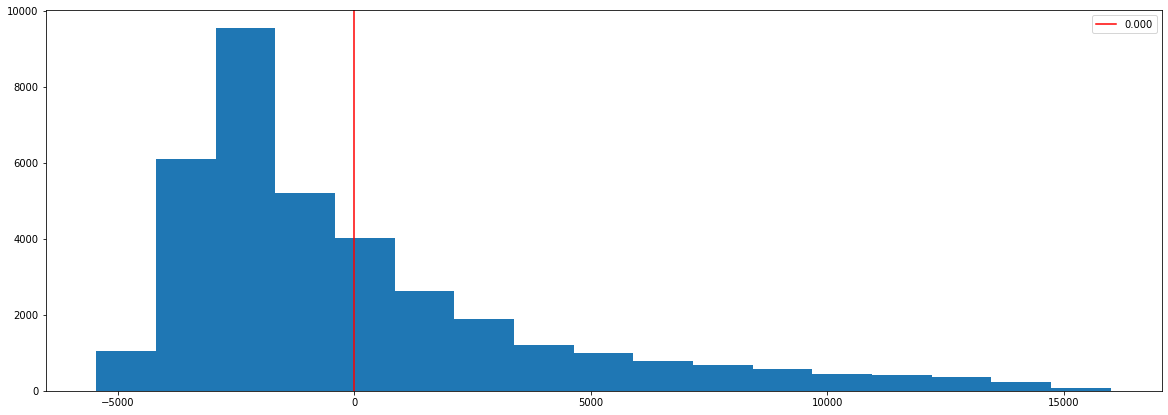

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the train set.
train_error_values = y_train - y_train_pred
plt.figure(figsize=(20,7))
plt.hist(train_error_values,bins='sturges')
plt.axvline(x = train_error_values.mean(),label=f"{train_error_values.mean():.3f}",color='red')
plt.legend()
plt.show()

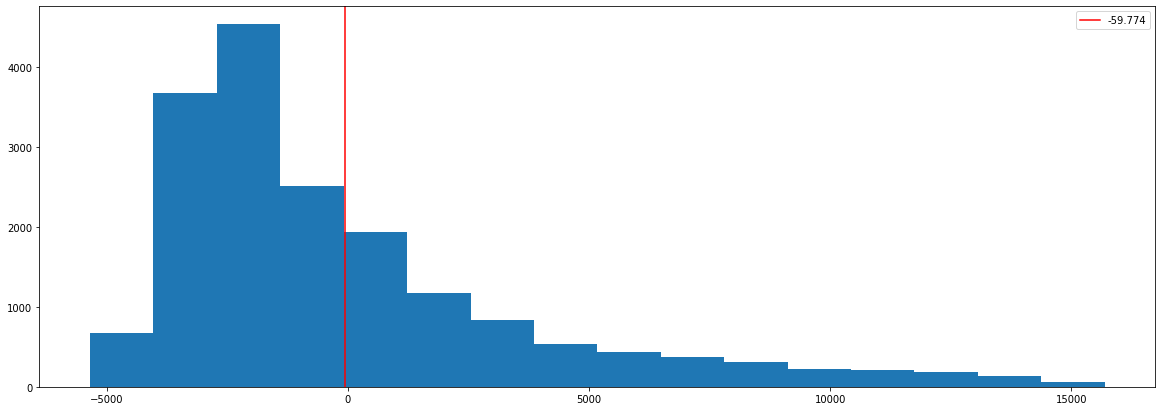

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the test set.
test_error_values = y_test - y_test_pred
plt.figure(figsize=(20,7))
plt.hist(test_error_values,bins='sturges')
plt.axvline(x = test_error_values.mean(),label=f"{test_error_values.mean():.3f}",color='red')
plt.legend()
plt.show()

**Q:** Is the mean of errors equal to 0 for train set?

**A:** Yes

**Q:** Is the mean of errors equal to 0 for test set?

**A:** No

---

#### 7. Verify Homoscedasticity

Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

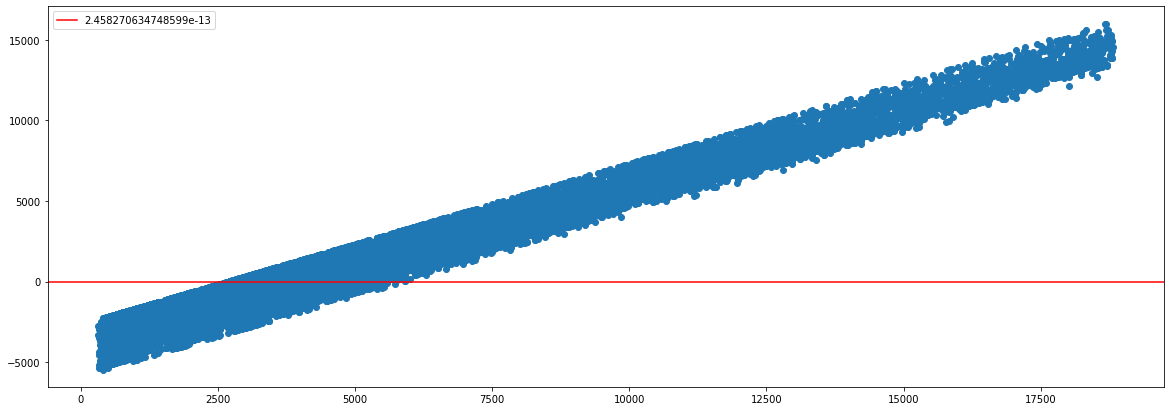

In [ ]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize=(20,7))
plt.scatter(y_train,train_error_values)
plt.axhline(y=train_error_values.mean(),color='r',label = train_error_values.mean())
plt.legend()
plt.show()

**Q:** Do you find any pattern or trend in the scatter plot? Whether the residuals exhibit constant variance around mean of errors?

**A:** Yes, There is a trend.



---

### Submitting the Project

Follow the steps described below to submit the project.

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>


3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_CapstoneProject16**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_CapstoneProject16** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>


---